In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("../../")
import copy
import os
import logging
from src.utils import logging_utils
from src import functional
from src.models import ModelandTokenizer
# from src.data import load_relation
import json

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

In [3]:
RESULTS_DIR = os.path.join("../../", "results")
causal_tracing_dir = os.path.join(RESULTS_DIR, "causal_tracing_aie")

hooks = os.listdir(causal_tracing_dir)
hooks

['residual', 'ssm_after_ssm', 'mlp_after_silu']

country_capital_city.json - 16 samples
2024-03-22 14:59:26 matplotlib.colorbar DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7f37f18f7a30>
2024-03-22 14:59:26 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:26 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:26 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:26 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting


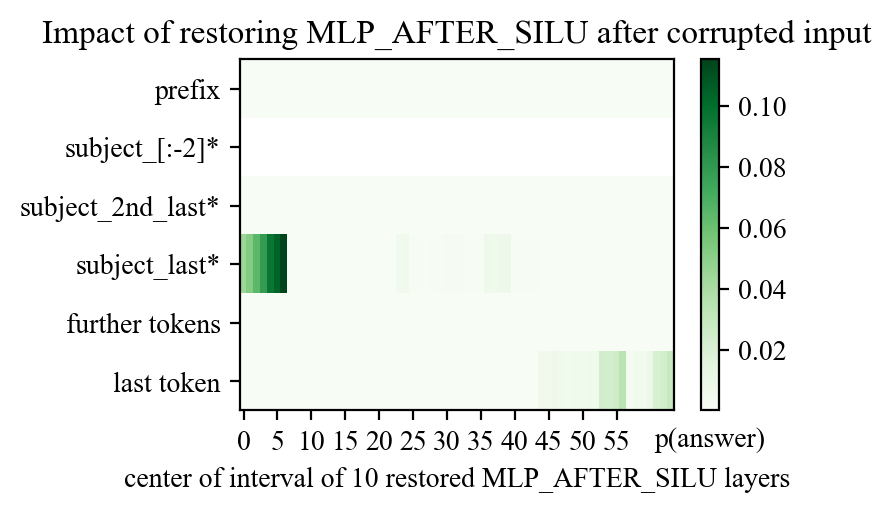

person_plays_pro_sport.json - 137 samples
2024-03-22 14:59:26 matplotlib.colorbar DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7f37f2696a40>
2024-03-22 14:59:26 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:26 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:26 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:26 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting


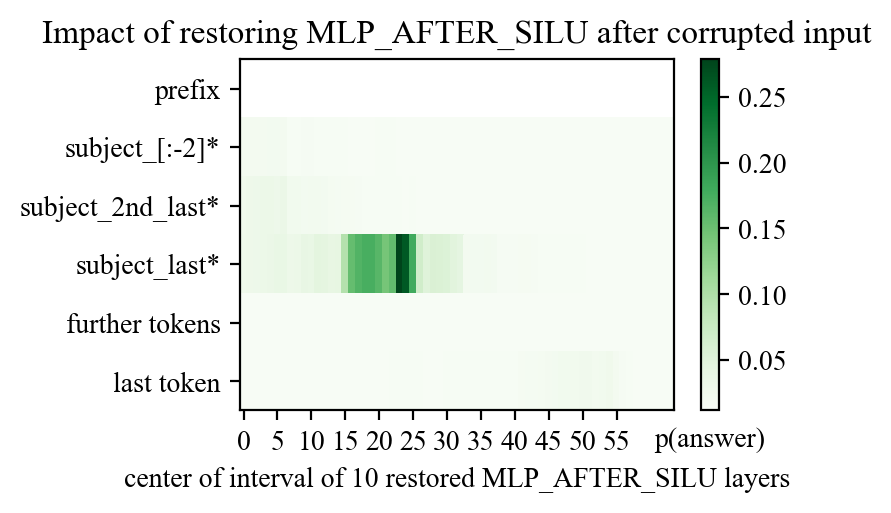

company_hq.json - 150 samples
2024-03-22 14:59:26 matplotlib.colorbar DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7f37f28e6ef0>
2024-03-22 14:59:26 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:26 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:27 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:27 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting


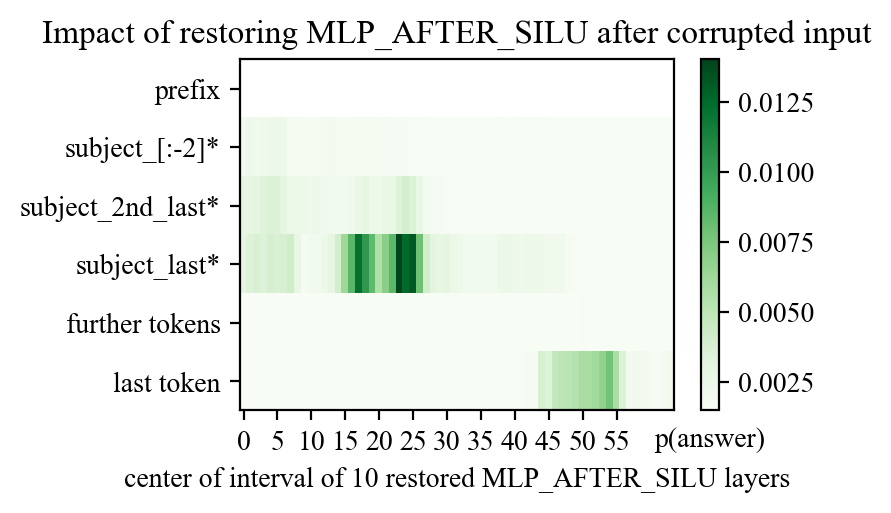

landmark_in_country.json - 150 samples
2024-03-22 14:59:27 matplotlib.colorbar DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7f37eb4a23b0>
2024-03-22 14:59:27 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:27 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:27 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:27 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting


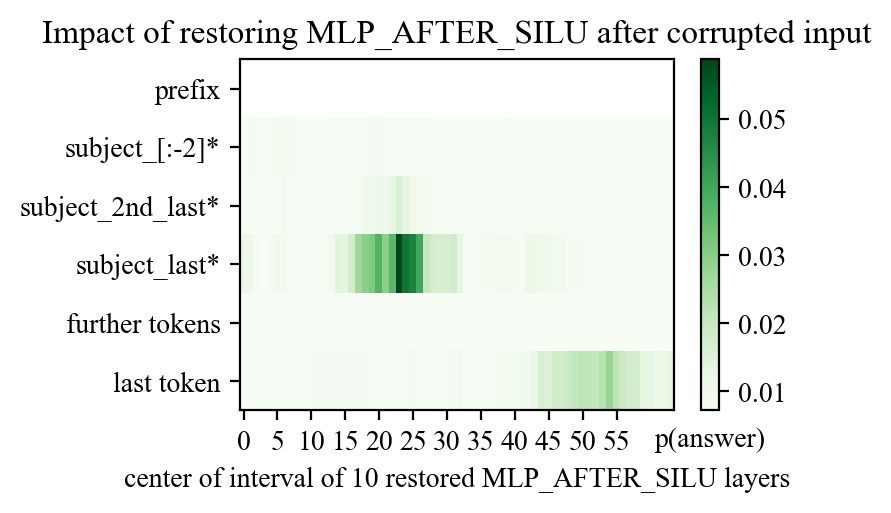

person_occupation.json - 52 samples
2024-03-22 14:59:27 matplotlib.colorbar DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7f37f1101840>
2024-03-22 14:59:27 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:27 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:27 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:27 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting


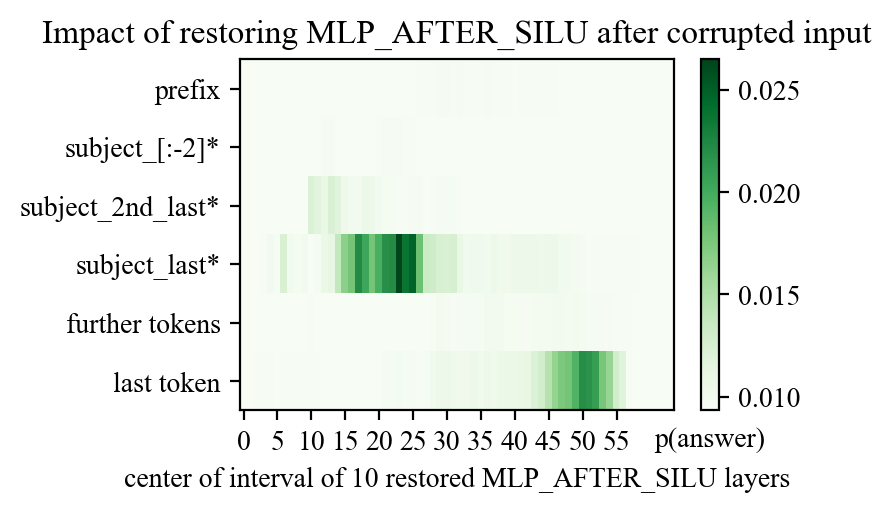

product_by_company.json - 150 samples
2024-03-22 14:59:27 matplotlib.colorbar DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7f37f2dc8ee0>
2024-03-22 14:59:27 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:27 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:27 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:27 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting


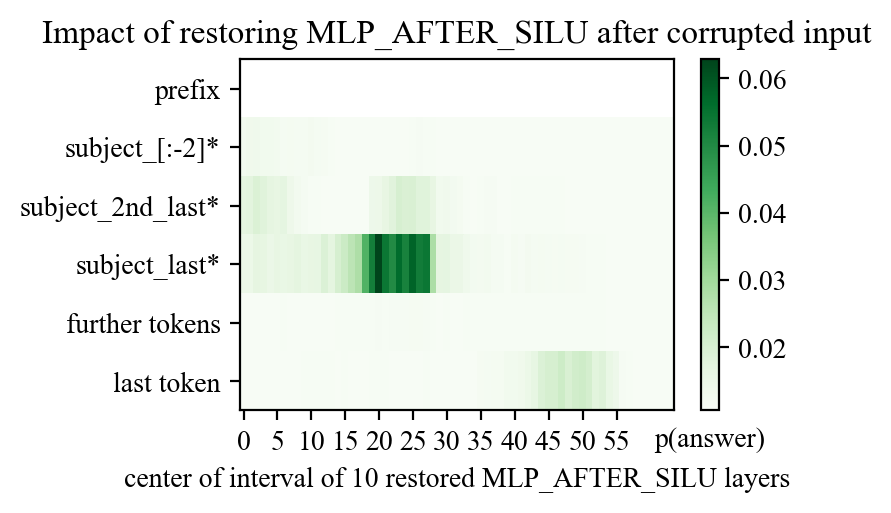

place_in_city.json - 99 samples
2024-03-22 14:59:27 matplotlib.colorbar DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7f37f1b1e200>
2024-03-22 14:59:27 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:27 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:27 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:27 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting


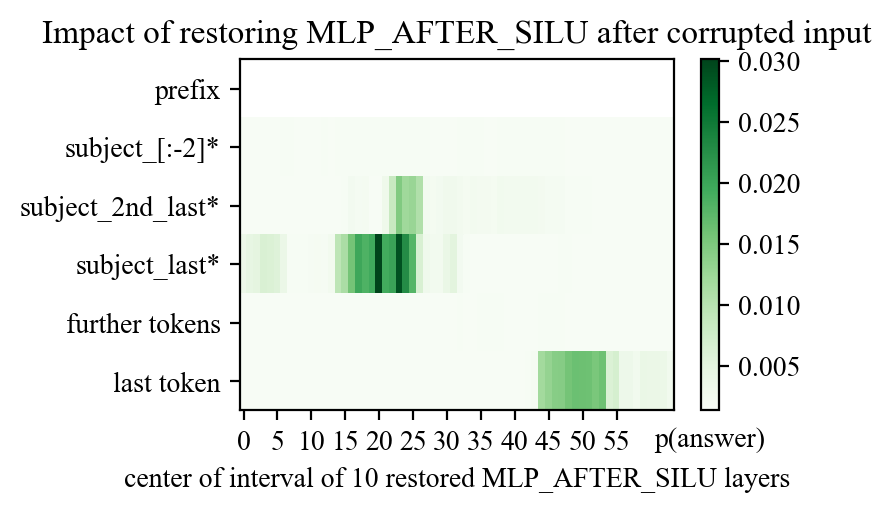

In [26]:
from src.tracing import average_indirect_effects
from src.plotting import plot_trace_heatmap
from typing import Literal

# hook = hooks[0]
hook: Literal["residual", "ssm_after_ssm", "mlp_after_silu"] = "mlp_after_silu"
relation_files = os.listdir(os.path.join(causal_tracing_dir, hook))

aie_all = {}

for relation_file in relation_files:

    with open(os.path.join(causal_tracing_dir, hook, relation_file), "r") as f:
        relation_ie_all = json.load(f)

    if relation_file == "person_native_language.json":
        continue
    
    print(f"{relation_file} - {len(relation_ie_all.keys())} samples")

    for k, v in relation_ie_all.items():
        aie_all[f"{k}_{relation_file}_{hook}"] = v

    relation_aie = average_indirect_effects(relation_ie_all)
    plot_trace_heatmap(relation_aie, modelname="Mamba-2.8b")

754
2024-03-22 14:59:27 matplotlib.colorbar DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7f37f1d5e800>
2024-03-22 14:59:27 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:27 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:27 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2024-03-22 14:59:27 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting


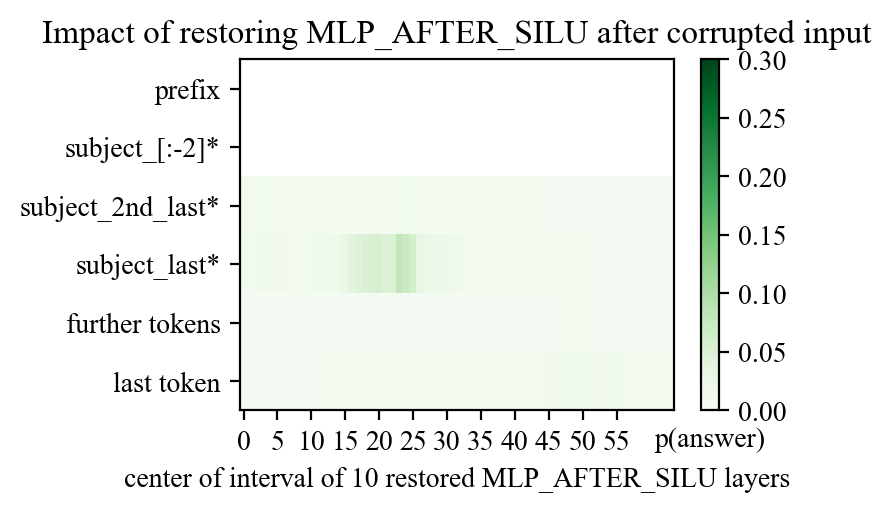

In [27]:
print(len(aie_all.keys()))

aie = average_indirect_effects(aie_all)
plot_trace_heatmap(
    aie, 
    modelname="Mamba-2.8b", 
    scale_range=(0.0, 0.3)
)